In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import utils
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np

In [2]:
# #read the sdf file of 10 predictable molecules
# ligands_996 =Chem.SDMolSupplier('/Users/blair/Desktop/input/RF_Ustatistic/wholemol/ndonor.sdf')
# #create the ecfp fingerprint
# #x is the input, 2 is the radius
# morgan_996=[AllChem.GetMorganFingerprintAsBitVect(x,2,nBits=1024) for x in ligands_996]
# efp_996=np.array(morgan_996)
# efp_996.shape

In [3]:
# # #save the ecfp in a csv file
# pd.DataFrame(efp_996).to_csv('/Users/blair/Desktop/input/RF_Ustatistic/wholemol/ndonor.csv')

In [4]:
# #define a function for normalizing in vertical order
# def col_normalize(X):
#     X1=np.matrix(X)
#     X_1=X1.transpose()
#     X_2=np.array(X_1)
#     X_3=preprocessing.normalize(X_2,norm="l2")
#     X_4=np.matrix(X_3)
#     X_5=X_4.transpose()
#     X_6=np.array(X_5)
#     return X_6

In [5]:
#read the file containing the ecfp and isomer(1 or 2) and normalize
input=pd.read_csv('input_992.csv')#Put address
nfp_992=pd.read_csv('neuralfp.csv')
nfp_992=np.array(nfp_992)
print(len(nfp_992))
Isomer=input[['Isomer']].copy()
X_992=np.concatenate((nfp_992,Isomer),axis=1)
#X_785=col_normalize(X_785)
X_992.shape

992


(992, 1025)

In [6]:
#assign the Hammett constants to Y
Y_992=input[['Hammett Constant']].copy()
Y_992=np.array(Y_992)

In [7]:
nfp_ndonor=pd.read_csv('neuralfp_ndonor.csv')
nfp_ndonor=np.array(nfp_ndonor)
X_ndonor=nfp_ndonor
X_ndonor.shape

(10, 1025)

In [8]:
#create null list to record values later
MSE_boot=np.zeros((1000),dtype= float)
#Index= np.zeros((1000,662),dtype=int)
Y_prediction_train=np.zeros((992,1000),dtype=float)
#Y_prediction_test=np.zeros((334,1000),dtype=float)
Y_pred_all=np.zeros((992,1000),dtype=float)
Y_target_train=np.zeros((992,1000),dtype=float)
#Y_target_test=np.zeros((334,1000),dtype=float)
Y_prediction_ndonor=np.zeros((10,1000),dtype=float)
MSE_boot=np.zeros((1000),dtype= float)
print(Y_target_train[0].shape)

(1000,)


In [9]:
regr = RandomForestRegressor(n_estimators=1, max_depth=None, random_state=None,bootstrap=0)

In [10]:
for m in range(0,1000):
    #positive part
    index_992=np.random.choice(992, size=992, replace=1)
    X_train=X_992[index_992]
    Y_train=Y_992[index_992]
    X_test=np.delete(X_train,index_992,axis=0)
    Y_test=np.delete(Y_train,index_992,axis=0)
    #Y_positive_left.shape
    #negative part
#     index_negative=np.random.choice(183, size=183, replace=1)
#     X_121=X_183[index_negative]
#     Y_121=Y_negative[index_negative]
#     X_negative_left=np.delete(X_183,index_negative,axis=0)
#     Y_negative_left=np.delete(Y_negative,index_negative,axis=0)
#     #neutral part
#     index_zeros=np.random.choice(28, size=28, replace=1)
#     X_18=X_28[index_zeros]
#     Y_18=Y_zeros[index_zeros]
#     X_zeros_left=np.delete(X_28,index_zeros,axis=0)
#     Y_zeros_left=np.delete(Y_zeros,index_zeros,axis=0)
#     #target
#     X_662=np.concatenate((X_523,X_121,X_18),axis=0)
#     Y_662=np.concatenate((Y_523,Y_121,Y_18),axis=0)
#     X_662, Y_662 = shuffle(X_662, Y_662)
#     #X_662.shape
#     #print(Y_662.shape)
#     #left
#     X_left=np.concatenate((X_positive_left,X_negative_left,X_zeros_left),axis=0)
#     Y_left=np.concatenate((Y_positive_left,Y_negative_left,Y_zeros_left),axis=0)
#     Y_target_train[:,m]=Y_662.ravel()
#     #Y_target_test[:,m]=Y_left.ravel()
#     #Y_left.shape
#     #RF
    X_resample= X_train
    Y_resample= Y_train
    regr.fit(X_resample, Y_resample.ravel())
    Y_pred_train=regr.predict(X_resample)    #Fit RF on training set
    Y_pred_test=regr.predict(X_test)        #Fit RF on testing set
    Y_pred_all_each=regr.predict(X_992)     # Fit RF on complete database
    Y_pred_all[:,m]=Y_pred_all_each
    #Y_prediction_test[:,m]=Y_pred_left
    Y_prediction_train[:,m]=Y_pred_train
    #Y_pred_all=regr.predict(X_996)
    Y_pred_ndonor=regr.predict(X_ndonor)    # Fit RF on ndonor
    Y_prediction_ndonor[:,m]=Y_pred_ndonor
    MSE_train=mean_squared_error(Y_resample, Y_pred_train)
    MSE_test=mean_squared_error(Y_test, Y_pred_test)
    MSE_boot[m]=(MSE_train*0.368)+(0.632)*(MSE_test)

In [11]:
Y_prediction_mean=Y_pred_all.mean(axis=1)
Y_prediction_mean

array([ 0.28046   ,  0.03413   ,  0.06199   , -0.3312    , -0.36036   ,
        0.39833   ,  0.46337   ,  0.30229   ,  0.15605   ,  0.54028   ,
        0.57636   ,  0.72036   ,  0.77189   ,  0.31484   ,  0.3294    ,
        0.310058  ,  0.31568   ,  0.45961   ,  0.51061   ,  0.18653   ,
        0.10171   ,  0.40428   ,  0.43994   ,  0.39288   ,  0.48944   ,
        0.42193   ,  0.48687   ,  0.502692  ,  0.52023667,  0.30981   ,
        0.324615  ,  0.46448   ,  0.52344   ,  0.03692   , -0.03049   ,
        0.14763033,  0.14957033, -0.0883    , -0.12834   , -0.07477   ,
       -0.13866   , -0.05238   ,  0.16166   , -0.13279   ,  0.14999533,
        0.14801583,  0.18573   ,  0.17095   ,  0.05963464, -0.06457   ,
        0.14307667,  0.131715  ,  0.130797  ,  0.12708   , -0.01348   ,
       -0.08738   ,  0.48012667,  0.44936567,  0.01718833, -0.020525  ,
        0.17492   ,  0.18325429,  0.16956   ,  0.16666   ,  0.31526   ,
        0.33074   ,  0.28811   ,  0.26992667,  0.09915   ,  0.02

In [12]:
Y_prediction_std=Y_pred_all.std(axis=1)
Y_prediction_std

array([0.05300555, 0.09943663, 0.10275086, 0.28669768, 0.24597778,
       0.14048456, 0.13933823, 0.227204  , 0.30703794, 0.06602213,
       0.07274167, 0.15240102, 0.16475475, 0.10626276, 0.13305202,
       0.10364015, 0.11727718, 0.10331813, 0.10125477, 0.1179655 ,
       0.13811001, 0.07221968, 0.08581023, 0.07982547, 0.09340924,
       0.07552599, 0.08168906, 0.10604234, 0.11597595, 0.0924579 ,
       0.1058845 , 0.09575139, 0.10153111, 0.10937236, 0.1320964 ,
       0.13164421, 0.13661056, 0.09070342, 0.08508375, 0.08046581,
       0.09540652, 0.08983839, 0.15267562, 0.10159289, 0.14803333,
       0.15026691, 0.0698675 , 0.08126744, 0.13509314, 0.17642793,
       0.12160953, 0.12571305, 0.11507713, 0.12411604, 0.1676338 ,
       0.2002332 , 0.23414619, 0.2799627 , 0.10950082, 0.14093598,
       0.1366045 , 0.15986381, 0.14510757, 0.15943226, 0.06562875,
       0.05953194, 0.12792921, 0.14546911, 0.19676732, 0.25640222,
       0.26057398, 0.08588917, 0.0923777 , 0.08179352, 0.10314

In [13]:
sigma1=Y_prediction_std*2.03/(1000**0.5)
#sigma1.min()

In [14]:
MSE_all=mean_squared_error(Y_prediction_mean,Y_992)
MSE_all

0.0037410029524000527

In [15]:
#n_donor with NH2
Y_ndonor_mean=Y_prediction_ndonor.mean(axis=1)
print("        NOC,        NC,            N,           NCF3,       NNO2")
Y_ndonor_mean

        NOC,        NC,            N,           NCF3,       NNO2


array([ 0.03558   , -0.227835  ,  0.49533   ,  0.34236   ,  0.22687   ,
        0.25982333,  0.29903667,  0.48315   ,  0.62268   ,  0.5281    ])

In [16]:
# print("  NOC,        NC,         N,           NCF3,       NNO2,     imidazole_OC")
# print(Y_ndonor_mean)

In [17]:
Y_ndonor_std=Y_prediction_ndonor.std(axis=1)
Y_ndonor_std

array([0.28348133, 0.29876937, 0.38354125, 0.36752147, 0.47168517,
       0.32258577, 0.22028736, 0.33989966, 0.19678216, 0.17345775])

In [18]:
sigma2=Y_ndonor_std*2.03/(1000**0.5)
sigma2

array([0.01819787, 0.01917927, 0.02462114, 0.02359276, 0.03027947,
       0.02070815, 0.01414118, 0.0218196 , 0.01263228, 0.01113499])

In [19]:
#pd.DataFrame(Y_prediction_mean).to_csv('Y_prediction_mean.csv')#Put address

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 35}

matplotlib.rc('font', **font)
# filename = 'Y_all.csv'
# df = pd.read_csv(filename)
# #df1= pd.read_csv('FEC_10000.csv')
# df.columns#, df1.columns

#Plot parameters

xlow = -1.5
xhigh = 2.5


x=input['Hammett Constant']
y=Y_prediction_mean
y_err=[Y_prediction_std,Y_prediction_std]

/Users/blair/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


Text(-1.4, 1.9, 'Test set: 992 data points')

/Users/blair/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


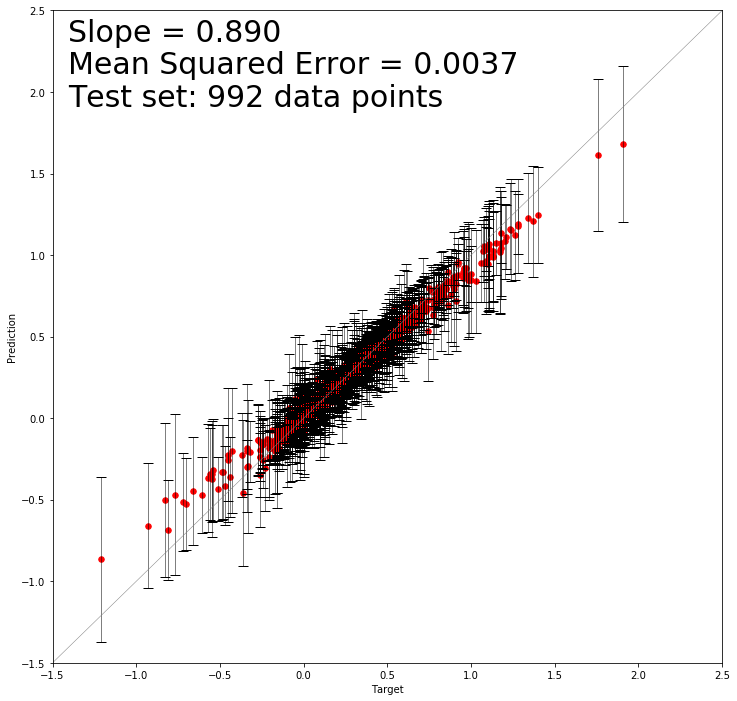

In [21]:
def scatplot(x_data, y_data, error_data, x_label, y_label, title):
    _, ax = plt.subplots(figsize=(12,12))
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.scatter(x_data, y_data, color = 'red',s=30)
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data,  
                yerr = error_data, 
                color = 'black', 
                ls = 'none', 
                lw = 0.5, capsize = 5)
    plt.xlim(xlow,xhigh)
    plt.ylim(xlow,xhigh)
    ax.plot([xlow, xhigh], [xlow, xhigh], color='gray', linestyle='-', linewidth=0.5)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title,fontsize=22.5)
    

# Call the function to create plot
scatplot(x_data = x, 
         y_data = y,
         error_data = y_err,
         x_label = 'Target',
         y_label = 'Prediction',
         title = '')

plt.annotate('Slope = 0.890', 
             xy=(-1.4, 2.3),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Mean Squared Error = 0.0037', 
             xy=(-1.4, 2.1),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Test set: 992 data points', 
             xy=(-1.4, 1.9),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
        
#Plotting prediction for inputs without 
#plt.scatter(x1, y1, color = 'green',s=30)
#plt.errorbar(x1, y1,yerr = y1_err, color = 'k', ls = 'none', lw = 0.5, capsize = 5)
#plt.show()